In [1]:
from lstm_detection import DetectionTrainingModelPipeline, plot_learning_curve, plot_confusion_matrix

c:\Users\HP\Desktop\projects\TEG\env\lib\site-packages\statsmodels\compat\pandas.py:65: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import Int64Index as NumericIndex


In [2]:
pipeline = DetectionTrainingModelPipeline(configs='configs.json')
history = pipeline()


.........load_dataset is done.........
.........scale_input_data is done.........
.........lstm_data_transform is done.........
.........split_data is done.........
Epoch 1/100
3337/3337 [==============================] - 27s 7ms/step - loss: 0.4292 - binary_crossentropy: 0.4292 - val_loss: 0.4233 - val_binary_crossentropy: 0.4233
Epoch 2/100
3337/3337 [==============================] - 25s 7ms/step - loss: 0.4252 - binary_crossentropy: 0.4252 - val_loss: 0.4232 - val_binary_crossentropy: 0.4232
Epoch 3/100
3337/3337 [==============================] - 26s 8ms/step - loss: 0.4252 - binary_crossentropy: 0.4252 - val_loss: 0.4238 - val_binary_crossentropy: 0.4238
Epoch 4/100
3337/3337 [==============================] - 25s 7ms/step - loss: 0.4251 - binary_crossentropy: 0.4251 - val_loss: 0.4229 - val_binary_crossentropy: 0.4229
Epoch 5/100
3337/3337 [==============================] - 25s 7ms/step - loss: 0.4251 - binary_crossentropy: 0.4251 - val_loss: 0.4229 - val_binary_crossentropy: 0.

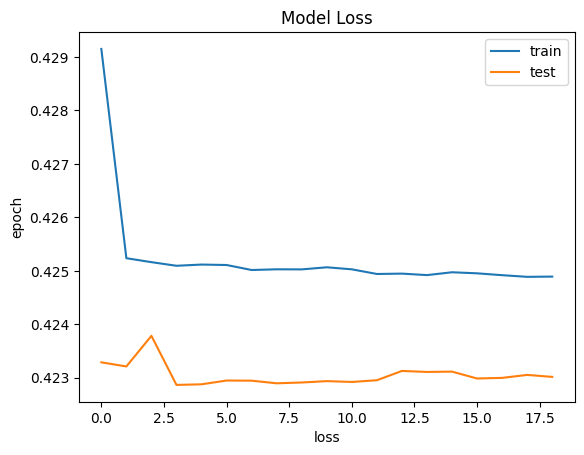

In [3]:
plot_learning_curve(
    dict_val = history.history,
    values = ['loss', 'val_loss'],
    x_label = 'epoch',
    y_label = 'loss',
    legend_list = ['train', 'test'],
    title = 'Model Loss',
    legend_loc = 'upper right'
)

4171/4171 [==============================] - 11s 2ms/step


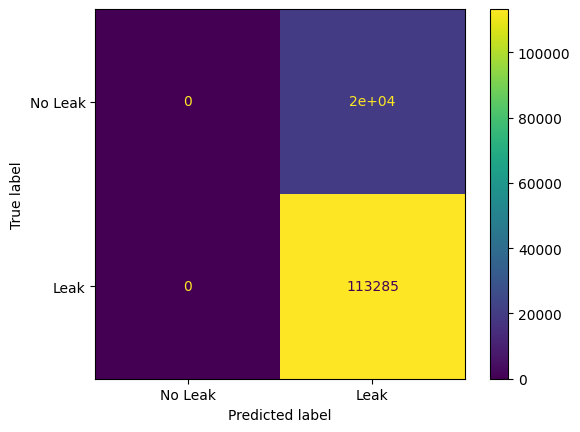

In [4]:
plot_confusion_matrix(
    model = pipeline.model,
    x_train = pipeline.X_train,
    x_test = pipeline.X_test,
    y_train = pipeline.y_train,
    y_test = pipeline.y_test,
    label_list = ['No Leak', 'Leak']
)